# Shikari King

## Research question/interests
How do different factors contributing to happiness, such as income, social support, freedom, and corruption, vary across different regions in the world, and how do these regional differences affect overall levels of happiness and life satisfaction?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geoplot as gplt

In [2]:
Data2015 = pd.read_csv('../data/processed/2015_Clean_Data.csv')
Data2016 = pd.read_csv('../data/processed/2016_Clean_Data.csv')
Data2017 = pd.read_csv('../data/processed/2017_Clean_Data.csv')
Data2018 = pd.read_csv('../data/processed/2018_Clean_Data.csv')
Data2019 = pd.read_csv('../data/processed/2019_Clean_Data.csv')
Data2020 = pd.read_csv('../data/processed/2020_Clean_Data.csv')
Data2021 = pd.read_csv('../data/processed/2021_Clean_Data.csv')
Data2022 = pd.read_csv('../data/processed/2022_Clean_Data.csv')
DataCombine = pd.read_csv('../data/processed/Overall(No-Year)_Clean_Data.csv')
DataAllYears = pd.read_csv('../data/processed/Overall(With-year)_Clean_Data.csv')

In [23]:
DataAllYears.columns

Index(['Country', 'Year', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom to make life choices', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Social support',
       'Perceptions of corruption', 'Logged GDP per capita',
       'Healthy life expectancy', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'Dystopia (1.83) + residual',
       'Explained by: GDP per capita'],
      dtype='object')

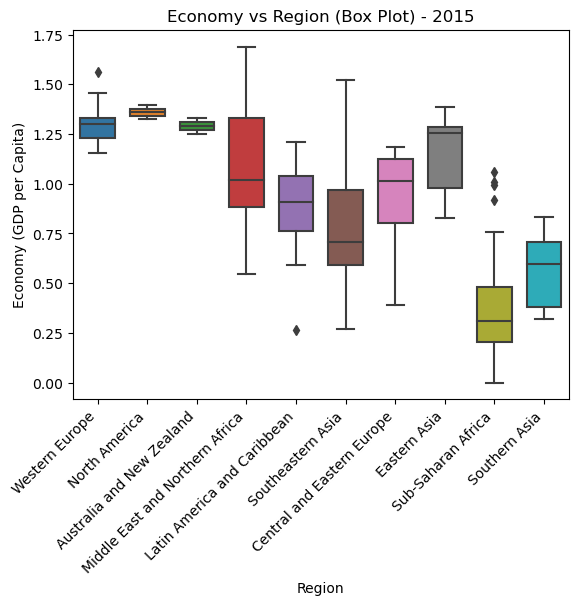

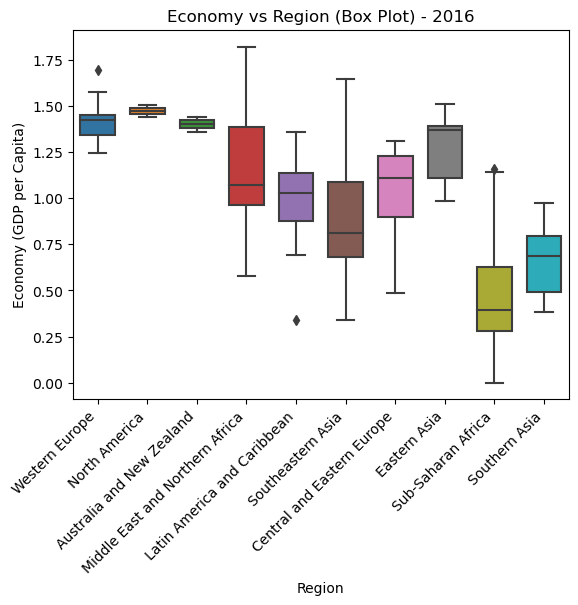

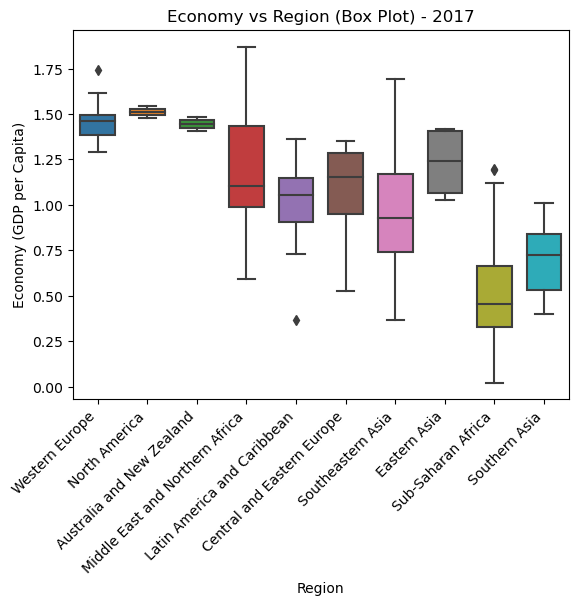

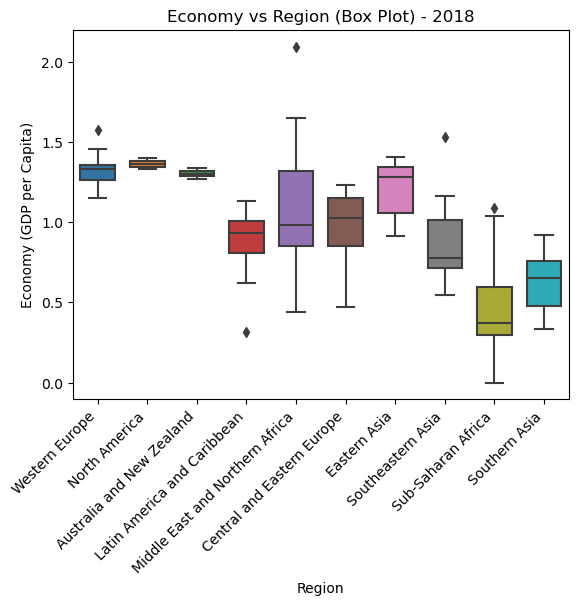

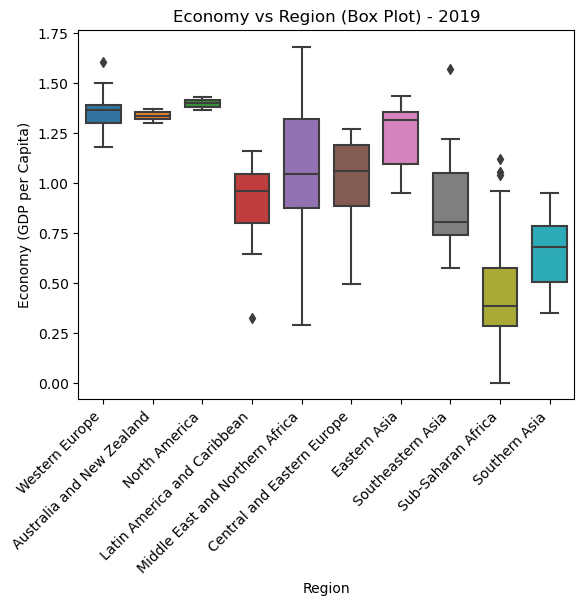

In [6]:
datasets = [(Data2015,'Economy vs Region (Box Plot) - 2015'),
            (Data2016,'Economy vs Region (Box Plot) - 2016'),
            (Data2017,'Economy vs Region (Box Plot) - 2017'),
            (Data2018,'Economy vs Region (Box Plot) - 2018'), 
            (Data2019,'Economy vs Region (Box Plot) - 2019'),]

for dataset, title in datasets:
    data = dataset
    sns.boxplot(x='Region', y='Economy (GDP per Capita)', data=data, width=0.7)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

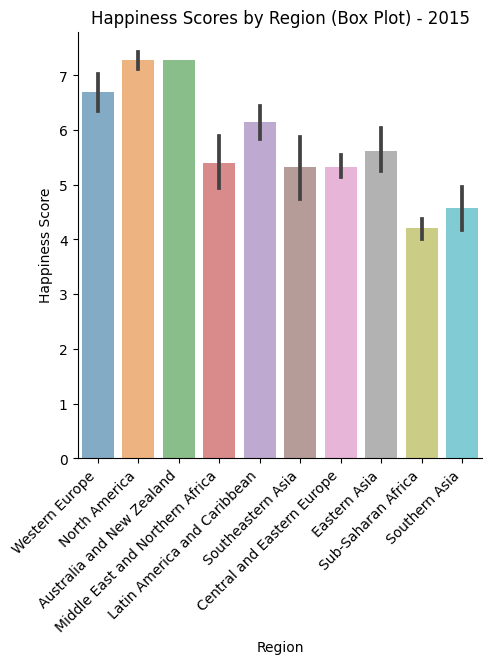

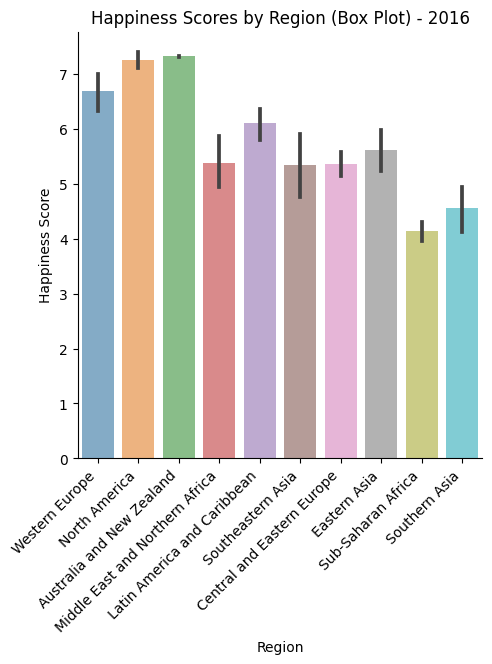

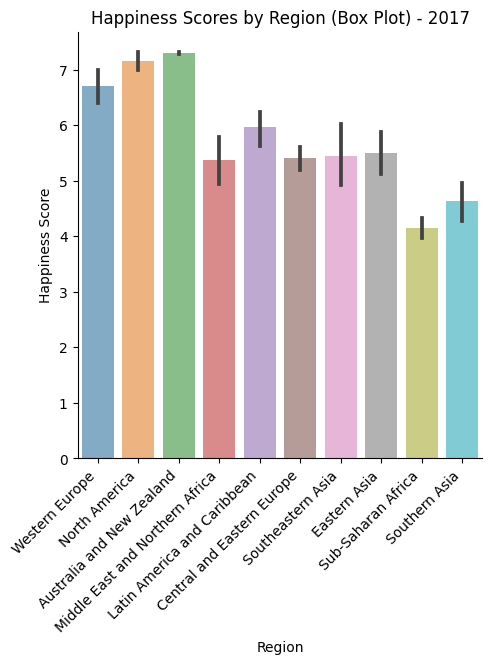

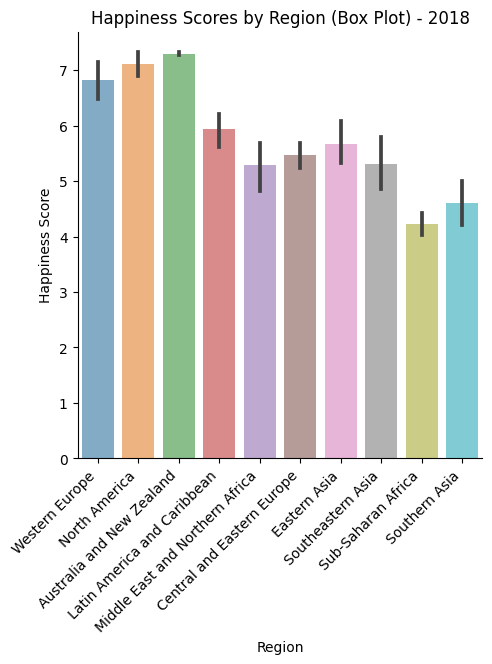

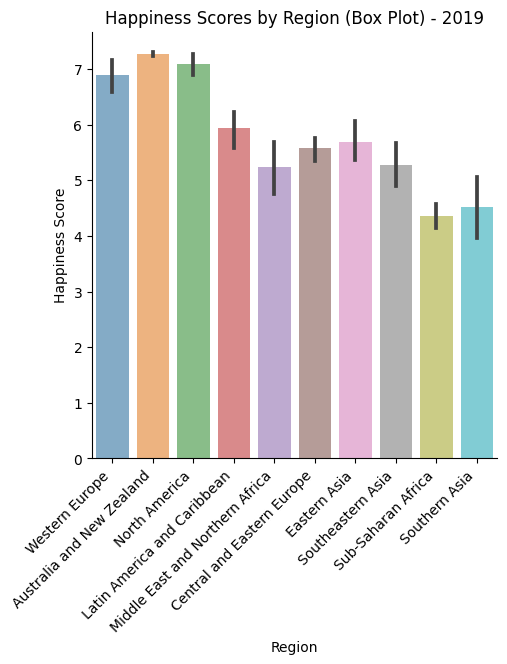

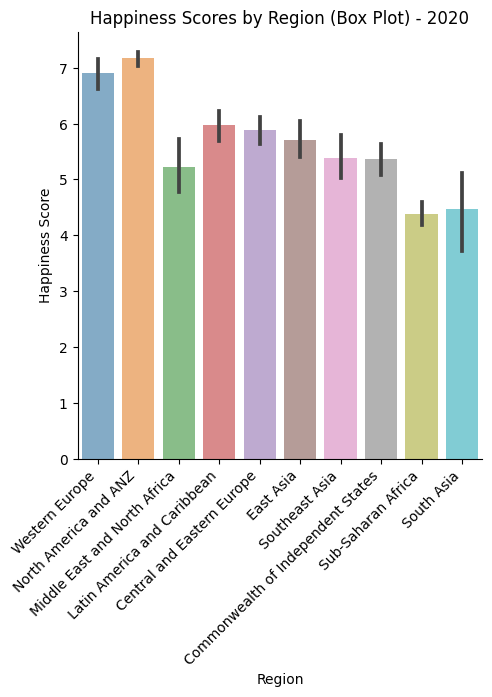

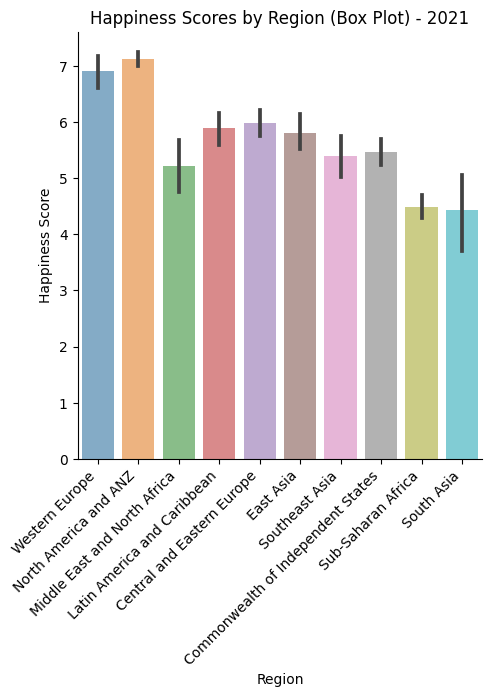

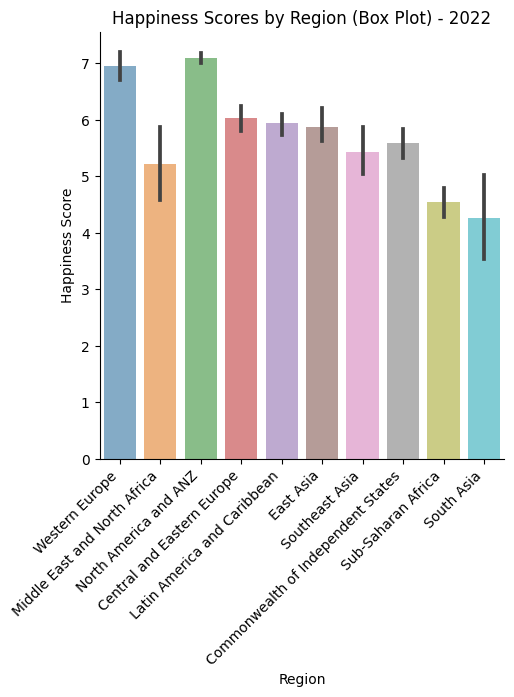

In [50]:
for dataset, title in datasets:
    data = dataset
    sns.catplot(x='Region', y='Happiness Score', data=data, kind="bar", alpha=.6)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.show()

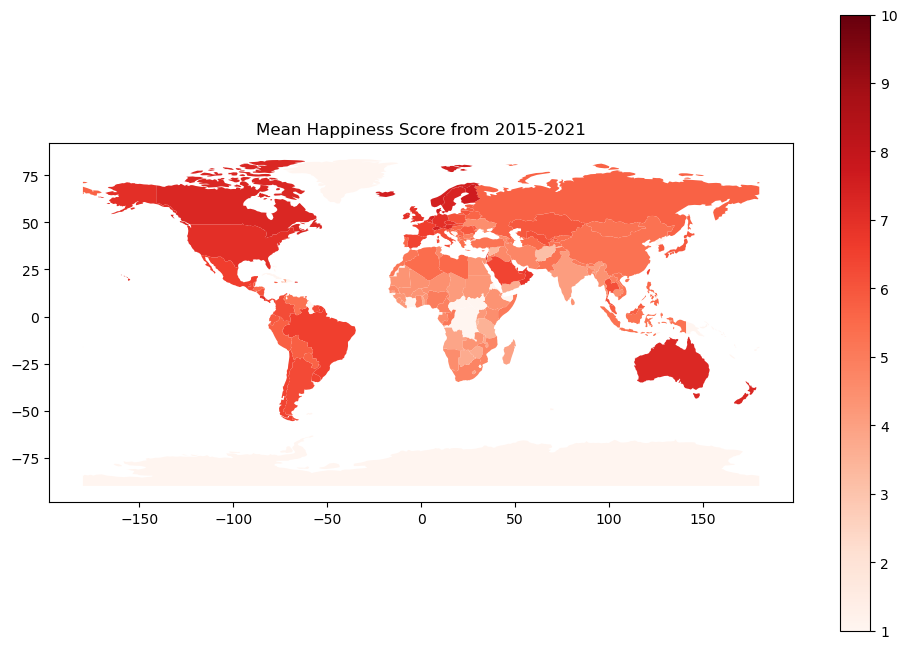

In [22]:
# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the projection of the world map to WGS84
world = world.to_crs(epsg=4326)
data = DataAllYears.groupby('Country')['Happiness Score'].mean().reset_index()

#had to change the country name
data['Country'] = data['Country'].replace('United States', 'United States of America')

data.rename(columns={'Country': 'name'}, inplace=True)
world_data['Happiness Score'] = world_data['Happiness Score'].map(data.set_index('name')['Happiness Score'])

# Merge the Happiness data with the world map data
world_data = world.merge(data, on='name', how='left')

world_data['Happiness Score'].fillna(0, inplace=True)

# Create the heatmap on the world map
fig, ax = plt.subplots(figsize=(12, 8))
world_data.plot(column='Happiness Score', cmap='Reds', legend=True, ax=ax, vmin=1, vmax=10)
ax.set_title('Mean Happiness Score from 2015-2021')
plt.show()

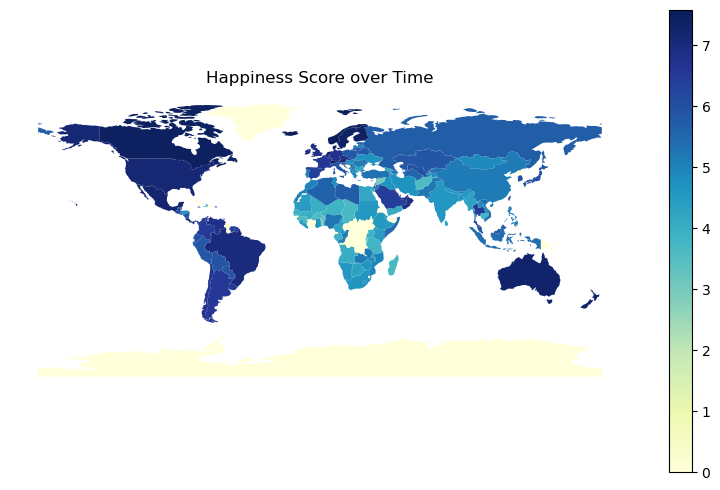

In [28]:

# Load the world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load the happiness data
data = DataAllYears

#had to change the country name
data['Country'] = data['Country'].replace('United States', 'United States of America')

# Convert the year column to a datetime object
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Group the data by year and country and get the mean happiness score
data_grouped = data.groupby(['Year', 'Country'])['Happiness Score'].mean().reset_index()

# Create a GeoDataFrame with the mean happiness scores for each country
world_data = gpd.GeoDataFrame()
world_data['geometry'] = world['geometry']
world_data['name'] = world['name']
world_data['Happiness Score'] = 0
for i in range(len(world_data)):
    name = world_data.loc[i, 'name']
    year = data_grouped.loc[data_grouped['Country'] == name, 'Year']
    score = data_grouped.loc[data_grouped['Country'] == name, 'Happiness Score']
    if not score.empty:
        index = world_data.index[world_data['name'] == name].tolist()[0]
        world_data.loc[index, 'Happiness Score'] = score.iloc[0]

# Create the time series map
fig, ax = plt.subplots(figsize=(10, 6))
world_data.plot(column='Happiness Score', cmap='YlGnBu', legend = True, linewidth=0.8, ax=ax)
plt.axis('off')
plt.title('Happiness Score over Time')
plt.show()
